### **Import**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm

# **1. Joint PDF, PMF and CDF**

### **Question 1: Joint PMF of Two Dice**

Write a Python function that computes the joint probability mass function (PMF) of the sum of two fair six-sided dice. The function should:

Generate all possible outcomes of rolling two six-sided dice.

Compute and return the joint PMF as a dictionary, where keys are tuples
(𝑋,𝑌) representing the outcomes of the two dice, and values are the corresponding probabilities.

In [2]:
def joint_PMF():
    outcomes = [(x, y) for x in range(1, 7) for y in range(1, 7)]

    joint_pmf = {}
    for outcome in outcomes:
        joint_pmf[outcome] = 1 / 36
    
    return joint_pmf

In [3]:
pmf = joint_PMF()
for outcome, probability in pmf.items():
    print(f"Outcome {outcome}: Probability {probability:.4f}")

Outcome (1, 1): Probability 0.0278
Outcome (1, 2): Probability 0.0278
Outcome (1, 3): Probability 0.0278
Outcome (1, 4): Probability 0.0278
Outcome (1, 5): Probability 0.0278
Outcome (1, 6): Probability 0.0278
Outcome (2, 1): Probability 0.0278
Outcome (2, 2): Probability 0.0278
Outcome (2, 3): Probability 0.0278
Outcome (2, 4): Probability 0.0278
Outcome (2, 5): Probability 0.0278
Outcome (2, 6): Probability 0.0278
Outcome (3, 1): Probability 0.0278
Outcome (3, 2): Probability 0.0278
Outcome (3, 3): Probability 0.0278
Outcome (3, 4): Probability 0.0278
Outcome (3, 5): Probability 0.0278
Outcome (3, 6): Probability 0.0278
Outcome (4, 1): Probability 0.0278
Outcome (4, 2): Probability 0.0278
Outcome (4, 3): Probability 0.0278
Outcome (4, 4): Probability 0.0278
Outcome (4, 5): Probability 0.0278
Outcome (4, 6): Probability 0.0278
Outcome (5, 1): Probability 0.0278
Outcome (5, 2): Probability 0.0278
Outcome (5, 3): Probability 0.0278
Outcome (5, 4): Probability 0.0278
Outcome (5, 5): Prob

### **Question 2: Joint CDF of Two Dice**

Write a Python function that calculates the joint cumulative distribution function (CDF) for rolling two six-sided dice. The function should:

Accept two integers a and b, representing dice outcomes up to which the CDF is computed.

Compute 𝑃(𝑋≤𝑎,𝑌≤𝑏) which is the probability that the first die is at most a and the second die is at most b.

In [4]:
def joint_cdf(a, b):
    cum_prob = a*b/36
    return cum_prob

a, b = 3, 4
cdf = joint_cdf(a, b)
print(f"P(X ≤ {a}, Y ≤ {b}) = {cdf:.4f}")

P(X ≤ 3, Y ≤ 4) = 0.3333


# **2. Joint Expectation**

### **Question 1: Monte Carlo Estimation of Joint Expectation**

**Objective:** Implement a Monte Carlo simulation to estimate the expected value of a function of two jointly distributed random variables.

**Problem Statement:**  
Let $X$ and $Y$ be two continuous random variables with joint probability density function (PDF):
$$
f_{X,Y}(x, y) = \begin{cases}
2(1 - y), & 0 \leq x \leq 1, 0 \leq y \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

Define the function $ g(X, Y) = X^2 + Y $.  
Using Monte Carlo simulation:
1. Generate $ N = 10,000 $ samples of $(X, Y)$ from the given joint distribution.
2. Estimate $ E[g(X, Y)] = E[X^2 + Y] $.
3. Compare your empirical estimate with the analytical solution.

**Instructions:**  
- Plot the sampled distribution of $(X, Y)$.
- Compute and report the relative error between the estimated and analytical expectation.

### Analytical expectation:
E[X^2 + Y] = E[X^2] + E[Y]

f_X,Y(x,y) = 6(1 - y), so we integrate:

E[X^2] = ∫₀¹∫₀¹ x² * 6(1 - y) dx dy = ∫₀¹ 6(1 - y) * ∫₀¹ x² dx dy = ∫₀¹ 6(1 - y) * (1/3) dy = 6 * (1/3) * ∫₀¹ (1 - y) dy = 6 * (1/3) * (1/2) = 1

E[Y] = ∫₀¹∫₀¹ y * 6(1 - y) dx dy = ∫₀¹ 6(1 - y) * y * ∫₀¹ dx dy = ∫₀¹ 6(1 - y) * y * 1 dy = 6 ∫₀¹ y(1 - y) dy = 6 ∫₀¹ (y - y²) dy = 6 * (1/2 - 1/3) = 6 * (1/6) = 1

In [5]:
def generate_samples(n):
    samples = []
    count = 0
    while len(samples) < n:
        x = torch.rand(1).item()
        y = torch.rand(1).item()
        u = torch.rand(1).item()
        if u < 6 * (1 - y):
            samples.append((x, y))
        count += 1
    x_vals, y_vals = zip(*samples)
    return torch.tensor(x_vals), torch.tensor(y_vals)

def g(x, y):
    return x**2 + y

In [6]:
n = 10000
x_samples, y_samples = generate_samples(n)

g_values = g(x_samples, y_samples)
estimated_expec = torch.mean(g_values).item()
print("Estimated E[g(X, Y)] is", estimated_expec)

actual_expec = 2.0
rel_error = abs(estimated_expec - actual_expec) / actual_expec
print("Relative error:", rel_error)

Estimated E[g(X, Y)] is 0.7984623312950134
Relative error: 0.6007688343524933


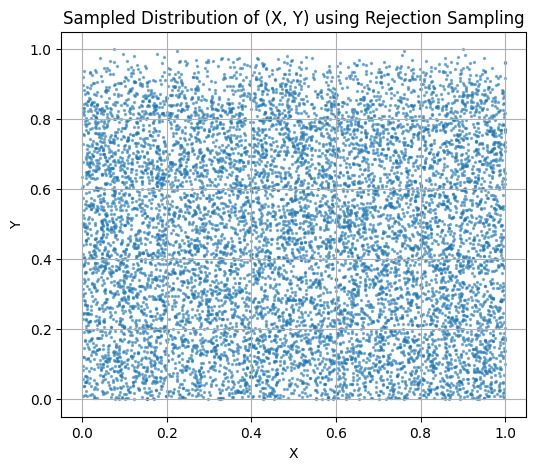

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(x_samples, y_samples, s=2, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sampled Distribution of (X, Y) using Rejection Sampling")
plt.grid(True)
plt.show()

### **Question 2: Linearity of Expectation in Joint Distributions**

**Objective:** Verify the linearity property of expectation using joint distributions.

**Problem Statement:**  
For any two random variables $ X $ and $ Y $, the expectation satisfies:

$$
E[aX + bY] = aE[X] + bE[Y]
$$

for constants $ a, b $. Using the joint PDF from Question 1:

**Tasks:**
1. Choose arbitrary values for $ a $ and $ b $.
2. Compute $ E[aX + bY] $ analytically and using Monte Carlo simulation.
3. Compute $ aE[X] + bE[Y] $ analytically and using Monte Carlo simulation.
4. Compare both results and compute the relative error.
5. Discuss why the linearity of expectation holds regardless of dependence between $ X $ and $ Y $.


In [8]:
import torch
import matplotlib.pyplot as plt

def generate_samples(n):
    samples = []
    while len(samples) < n:
        x = torch.rand(1).item()
        y = torch.rand(1).item()
        u = torch.rand(1).item()
        if u < 6 * (1 - y):
            samples.append((x, y))
    x_vals, y_vals = zip(*samples)
    return torch.tensor(x_vals), torch.tensor(y_vals)

a = 2
b = 3
n = 10000

x_samples, y_samples = generate_samples(n)

direct_estimate = torch.mean(a * x_samples + b * y_samples).item()

mean_x = torch.mean(x_samples).item()
mean_y = torch.mean(y_samples).item()
linear_estimate = a * mean_x + b * mean_y

E_X = 0.5
E_Y = 1/3
analytical_value = a * E_X + b * E_Y 

print(f"Monte Carlo estimate of E[aX + bY]: {direct_estimate:.4f}")
print(f"Monte Carlo estimate of aE[X] + bE[Y]: {linear_estimate:.4f}")
print(f"Analytical E[aX + bY] = aE[X] + bE[Y] = {analytical_value:.4f}")

error_direct = abs(direct_estimate - analytical_value) / analytical_value
error_linear = abs(linear_estimate - analytical_value) / analytical_value

print(f"Relative error (E[aX + bY]): {error_direct:.4f}")
print(f"Relative error (aE[X] + bE[Y]): {error_linear:.4f}")

Monte Carlo estimate of E[aX + bY]: 2.3873
Monte Carlo estimate of aE[X] + bE[Y]: 2.3873
Analytical E[aX + bY] = aE[X] + bE[Y] = 2.0000
Relative error (E[aX + bY]): 0.1937
Relative error (aE[X] + bE[Y]): 0.1937


Analytic approach:

$E[X] = \int\int x \cdot f_{X,Y}(x, y) \, dx \, dy = \int_0^1 \int_0^1 x \cdot 6(1 - y) \, dx \, dy = \frac{1}{2}$

$E[Y] = \int\int y \cdot f_{X,Y}(x, y) \, dx \, dy = \int_0^1 \int_0^1 y \cdot 6(1 - y) \, dx \, dy = \frac{1}{3}$

$E[2X + 3Y] = 2E[X] + 3E[Y] = 2(1/2) + 3(1/3) = 2$


Therefore analytical_expec = 2

Linearity of expectation holds because the expected value of a sum of random variables is the sum of their individual expected values, regardless of their dependence.

# **3. Correlation and covariance**

### **Question 1: Correlation Matrix and Identifying Highly Correlated Features**  
Given a batch of N samples with d features, implement a PyTorch function that computes the correlation matrix (from scratch without using torch.corrcoef) for the dataset. And then Identify Highly Correlated Features which are above a given threshold (e.g., 0.8). Return a list of feature pairs along with their correlation values.

#### **Example:**  
```python
import torch

def correlation_matrix(X):

def highly_correlated_features(X, threshold=0.8):

X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))
```

In [9]:
def correlation_matrix(X):
    X_mean = torch.mean(X, dim=0, keepdim=True)
    X_std = torch.std(X, dim=0, keepdim=True, unbiased=False)
    X_std[X_std == 0] = 1.0
    X_standardized = (X - X_mean) / X_std
    
    n_samples = X.size(0)
    corr_matrix = torch.mm(X_standardized.t(), X_standardized) / n_samples
    
    return corr_matrix

In [10]:
def highly_correlated_features(X, threshold=0.8):
    corr_matrix = correlation_matrix(X)
    d = corr_matrix.size(0)
    highly_correlated = []
    
    for i in range(d):
        for j in range(i, d):
            corr = corr_matrix[i, j].item()
            if abs(corr) > threshold:
                highly_correlated.append((i, j, corr))
    
    return highly_correlated

In [11]:
X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))

tensor([[ 1.0000,  0.1175,  0.1109, -0.0907,  0.1316],
        [ 0.1175,  1.0000, -0.1530, -0.0353,  0.0472],
        [ 0.1109, -0.1530,  1.0000, -0.1275,  0.0290],
        [-0.0907, -0.0353, -0.1275,  1.0000,  0.1482],
        [ 0.1316,  0.0472,  0.0290,  0.1482,  1.0000]])
[(0, 0, 0.9999999403953552), (0, 1, 0.11751323938369751), (0, 2, 0.11086113005876541), (0, 4, 0.13157904148101807), (1, 1, 0.9999998211860657), (1, 2, -0.15302124619483948), (2, 2, 1.0), (2, 3, -0.12754768133163452), (3, 3, 1.0), (3, 4, 0.14816142618656158), (4, 4, 0.9999999403953552)]


### **Question 2: Weighted Covariance**  
Compute a weighted covariance between two 1D PyTorch tensors `x` and `y`, where each sample pair `(x[i], y[i])` is assigned a weight `w[i]` from a weights tensor `weights`.

In the **weighted** version, each sample pair `(x[i], y[i])` is multiplied by a weight `w[i]`, and the means and covariance are adjusted accordingly. The weighted covariance formula becomes:

$$ \text{Cov}_w(X, Y) = \frac{1}{\sum w_i} \sum_{i=1}^{n} w_i (x_i - \bar{x}_w)(y_i - \bar{y}_w) $$

where:

$$ \bar{x}_w = \frac{\sum w_i x_i}{\sum w_i} $$
$$ \bar{y}_w = \frac{\sum w_i y_i}{\sum w_i} $$



In [12]:
def weighted_covariance(x, y, weights):

    weights_sum = torch.sum(weights)
    x_weighted_mean = torch.sum(weights * x) / weights_sum
    y_weighted_mean = torch.sum(weights * y) / weights_sum

    numerator = torch.sum(weights * (x - x_weighted_mean) * (y - y_weighted_mean))
    denominator = weights_sum
    weighted_cov = numerator / denominator

    return weighted_cov

In [13]:
x = torch.tensor([1, 2, 3, 4, 5])
y = torch.tensor([2, 4, 6, 8, 10])
weights = torch.tensor([.2, .2, .2, .2, .2])

result = weighted_covariance(x, y, weights)
print(f"Weighted Covariance: {result}")

Weighted Covariance: 4.0


# **4. Conditional Distributions**

### **Question 1:**

Let $X$ and $Y$ be continuous random variables with the joint PDF:

$
f_{X,Y}(x,y) = 2 e^{-x} e^{-y}, \quad {0} \leq {y} \leq {x} < \infty
$

Write a Python program that:

1. Computes the **marginal PDF** $(f_Y(y))$ for $y=1$:

   $
   f_Y(y) = \int_{y}^{\infty} f_{X,Y}(x,y) \, dx
   $

2. Computes the **conditional PDF** $( f_{X|Y}(x | y))$ for $x=2$ and $y=1$:

   $
   f_{X|Y}(x | y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
   $


In [14]:
def joint_pdf(x, y):
    if y < 0 or x < y:
        return 0.0
    return 2 * np.exp(-x) * np.exp(-y)

In [15]:
def marginal_pdf_y(y):
    if y < 0:
        return 0.0
    result, error = quad(lambda x: joint_pdf(x, y), y, np.inf)
    return result

In [16]:
def conditional_pdf(x, y):
    return joint_pdf(x, y)/marginal_pdf_y(y)

In [17]:
print(f"Marginal PDF at y=1: {marginal_pdf_y(1):.4f}")
print(f"Conditional PDF at x=2 and y=1: {conditional_pdf(2, 1):.4f}")

Marginal PDF at y=1: 0.2707
Conditional PDF at x=2 and y=1: 0.3679


### **Question 2:**

A binary signal \( X \) is transmitted over a noisy channel:

$
X =
\begin{cases}
+1, & \text{with probability } \frac{1}{2} \\
-1, & \text{with probability } \frac{1}{2}
\end{cases}
$

The received signal is modeled as:

$
Y = X + N, \quad N \sim \mathcal{N}(0,1)
$

where $( N $) is Gaussian noise with mean 0 and variance 1.

**To do:**

1. Compute and plot the likelihood function $( P(Y | X) )$.
2. Use **Bayes' theorem** to compute and plot the posterior probability:

   $
   P(X = +1 | Y > 0)
   $

3. Create a **3D surface plot** to visualize $P(X | Y)$ as a function of both $( X )$ and $( Y )$.


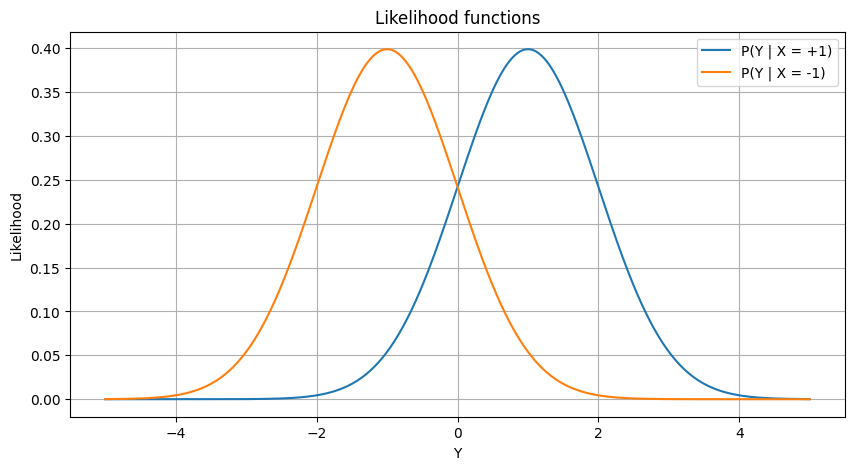

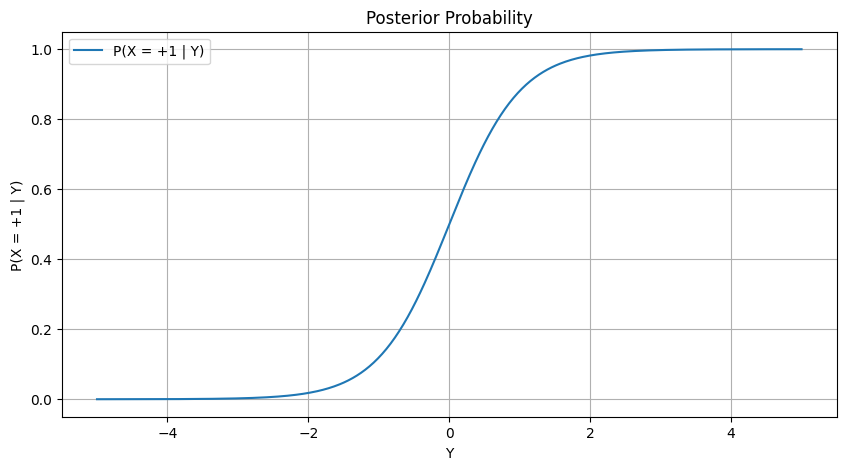

P(X = +1 | Y > 0) ≈ 0.9652


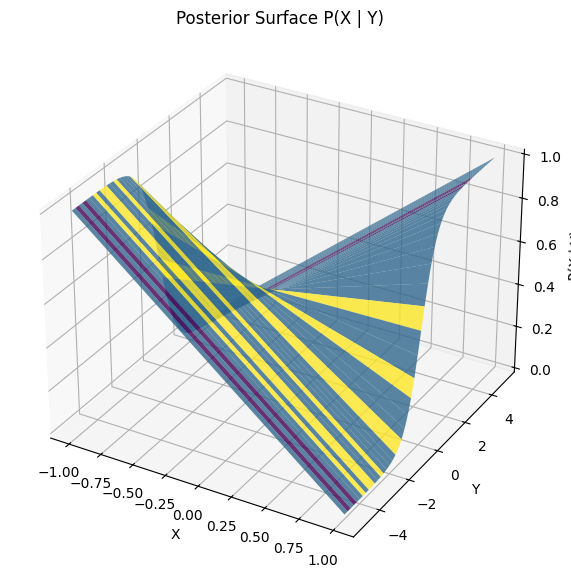

In [33]:
def p_y_given_x(y, x):
    return norm.pdf(y, x, 1)

def posterior_x_given_y(y):
    p_y_given_1 = p_y_given_x(y, 1)
    p_y_given_minus1 = p_y_given_x(y, -1)
    numerator = p_y_given_1 * 0.5
    denominator = numerator + p_y_given_minus1 * 0.5
    return numerator / denominator

y_vals = np.linspace(-5, 5, 500)

plt.figure(figsize=(10, 5))
plt.plot(y_vals, p_y_given_x(y_vals, 1), label="P(Y | X = +1)")
plt.plot(y_vals, p_y_given_x(y_vals, -1), label="P(Y | X = -1)")
plt.title("Likelihood functions")
plt.xlabel("Y")
plt.ylabel("Likelihood")
plt.legend()
plt.grid(True)
plt.show()

posterior_vals = posterior_x_given_y(y_vals)
plt.figure(figsize=(10, 5))
plt.plot(y_vals, posterior_vals, label="P(X = +1 | Y)")
plt.title("Posterior Probability")
plt.xlabel("Y")
plt.ylabel("P(X = +1 | Y)")
plt.grid(True)
plt.legend()
plt.show()

y_samples = np.linspace(0.001, 10, 1000)
posterior_y_gt_0 = np.mean(posterior_x_given_y(y_samples))
print(f"P(X = +1 | Y > 0) ≈ {posterior_y_gt_0:.4f}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X_vals = np.array([1, -1])
Y_grid = np.linspace(-5, 5, 300)
X_grid, Y_mesh = np.meshgrid(X_vals, Y_grid)

P_mesh = np.array([posterior_x_given_y(y) if x == 1 else 1 - posterior_x_given_y(y)
                   for x, y in zip(X_grid.ravel(), Y_mesh.ravel())])

P_mesh = P_mesh.reshape(X_grid.shape)

ax.plot_surface(X_grid, Y_mesh, P_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(X | Y)')
ax.set_title('Posterior Surface P(X | Y)')
plt.show()

# **5. Conditional expectation**

### **Question 1:**
You roll two fair 6-sided dice. Let S be the sum of the two dice, and let M be the maximum of the two dice.

- Theoretical Computation:

  Compute the unconditional expectation E[M], the expected maximum of two dice rolls.

  Compute the conditional expectation E[M∣S is even], the expected maximum given that the sum is even.

- Write a Python function simulate_dice_rolls(n) that:

  Simulates rolling two dice n times.

  Estimates both E[M] and E[M∣S is even].

  Compares the estimated values with the theoretical results.

  Run the function for 10,000 simulations and interpret the results.

#### **Theoretical Computation for E[M] and  E[M | S % 2 == 0]**

##### **1. Unconditional Expectation  E[M] \:**
The expected maximum \( M \) of two dice rolls is computed as:

$$
E[M] = \frac{1}{36} \sum_{i=1}^{6} \sum_{j=1}^{6} \max(i, j)
$$

$$
E[M] = \frac{161}{36} \approx 4.4722
$$

##### **2. Conditional Expectation E[M | S % 2 == 0]:**
The conditional expectation E[M | S % 2 == 0] is computed as:

$$
E[M \mid S \text{ is even}] = \frac{\sum_{\text{even } S} \max(i, j)}{\text{Count of outcomes with even } S}
$$

$$
E[M \mid S \text{ is even}] = \frac{79}{18} = 4.38888
$$

In [19]:
def simulate_dice_rolls_torch(n):

    die1 = torch.randint(1, 7, (n,))
    die2 = torch.randint(1, 7, (n,))

    M = torch.maximum(die1, die2)
    S = die1 + die2

    E_M = torch.mean(M.float()).item()

    M_given_even = M[S % 2 == 0]
    E_M_given_even = torch.mean(M_given_even.float()).item()

    print(f"Estimated E[M]: {E_M:.4f}")
    print(f"Estimated E[M | S is even]: {E_M_given_even:.4f}")


simulate_dice_rolls_torch(10000)

Estimated E[M]: 4.4598
Estimated E[M | S is even]: 4.3612


For 1000 simulations the ans of E[M] estimated and theoretical doesn't match. But as we keep on increasing the value of n it will approach theoretical value.

Same happens for E[ M | S % 2 == 0 ]

# **6. Sum of two random variables**

### **Question 1:**
Write a Python program to simulate the sum of two independent discrete uniform random variables \( X \) and \( Y \), where both are uniformly distributed over \{0, 1, 2, 3\}.

- Generate **100,000** random samples of \( X \) and \( Y \).
- Compute \( Z = X + Y \) for each sample.
- Plot the empirical probability mass function (PMF) of \( Z \) using Matplotlib.
- Compare the simulated PMF with the theoretical PMF.


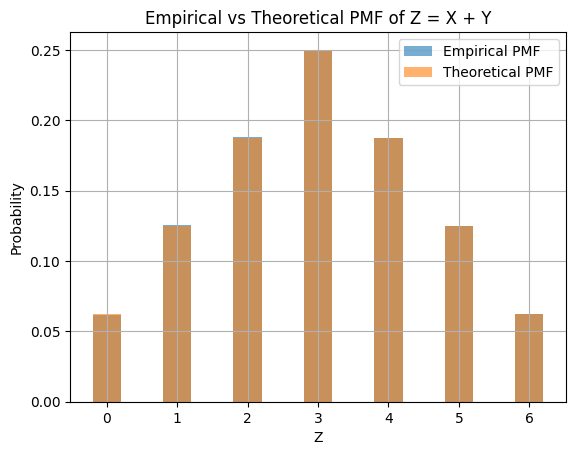

In [20]:
def simulate_discrete_uniform_sum():

    X = torch.randint(0, 4, (100000,))
    Y = torch.randint(0, 4, (100000,))
    Z = X + Y
    
    unique_values, counts = torch.unique(Z, return_counts=True)
    empirical_pmf = counts / 100000
    
    theoretical_pmf = {}
    for z in range(0, 7):
        count = 0
        for x in range(0, 4):
            for y in range(0, 4):
                if x + y == z:
                    count += 1
        theoretical_pmf[z] = count / 16
    
    plt.bar(unique_values.numpy(), empirical_pmf.numpy(), alpha=0.6, label="Empirical PMF", width=0.4)
    plt.bar(theoretical_pmf.keys(), theoretical_pmf.values(), alpha=0.6, label="Theoretical PMF", width=0.4)
    plt.xticks(range(0, 7))
    plt.xlabel("Z")
    plt.ylabel("Probability")
    plt.title("Empirical vs Theoretical PMF of Z = X + Y")
    plt.legend()
    plt.grid()
    plt.show()

simulate_discrete_uniform_sum()

When we increse the number of simulations we will see that empirical probability will approach theoretical probability.

# **7. Examples of sum of two random variables**

### Question 1: Numerical Convolution of Exponential PDFs

Let \(X\) and \(Y\) be independent random variables with PDFs:

\[
f_X(x) =
\begin{cases}
x e^{-x}, & x \geq 0 \\
0, & \text{otherwise}
\end{cases}
\]

\[
f_Y(y) =
\begin{cases}
y e^{-y}, & y \geq 0 \\
0, & \text{otherwise}
\end{cases}
\]

**Task:**  
1. Numerically compute the PDF of \(Z = X + Y\)  
2. Compare your numerical result with the analytical solution:

\[
f_Z(z) =
\begin{cases}
\dfrac{z^3}{6} e^{-z}, & z \geq 0 \\
0, & \text{otherwise}
\end{cases}
\]

In [21]:
def f_X(x):
    return x * np.exp(-x) if x >= 0 else 0

def f_Y(y):
    return y * np.exp(-y) if y >= 0 else 0

def f_Z(z):
    if z < 0:
        return 0
    result, error = quad(lambda x: f_X(x) * f_Y(z - x), 0, z)
    return result

In [22]:
z_values = np.linspace(0, 10, 500)
numerical_pmf = np.array([f_Z(z) for z in z_values])

def analytical_f_Z(z):
    return (z**3 / 6) * np.exp(-z) if z >= 0 else 0

analytical_pmf = np.array([analytical_f_Z(z) for z in z_values])

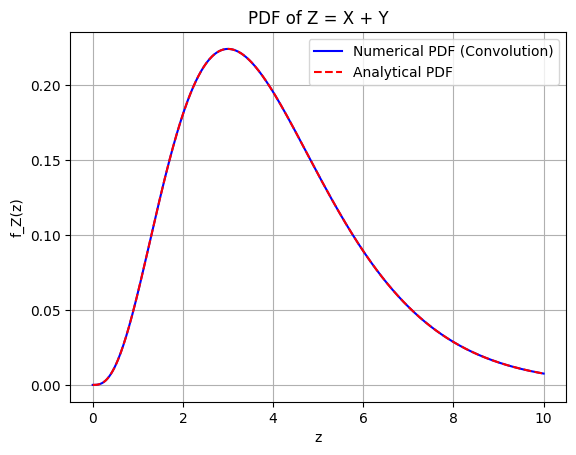

In [23]:
plt.plot(z_values, numerical_pmf, label="Numerical PDF (Convolution)", color="blue")
plt.plot(z_values, analytical_pmf, label="Analytical PDF", color="red", linestyle="--")
plt.xlabel("z")
plt.ylabel("f_Z(z)")
plt.title("PDF of Z = X + Y")
plt.legend()
plt.grid()
plt.show()

### **Question 2: Simulate the sum of two Gaussian variables**
X
∼
N
(
1
,
2
)
 and
Y
∼
N
(
3
,
4
)
 and verify that
X
+
Y
∼
N
(
4
,
6
)


In [24]:
X = torch.distributions.Normal(1, 1.414).sample((10000000,))
Y = torch.distributions.Normal(3, 2).sample((10000000,))
Z = X + Y

mean_Z = Z.mean().item()
variance_Z = Z.var(unbiased=False).item()
std_Z = np.sqrt(variance_Z)

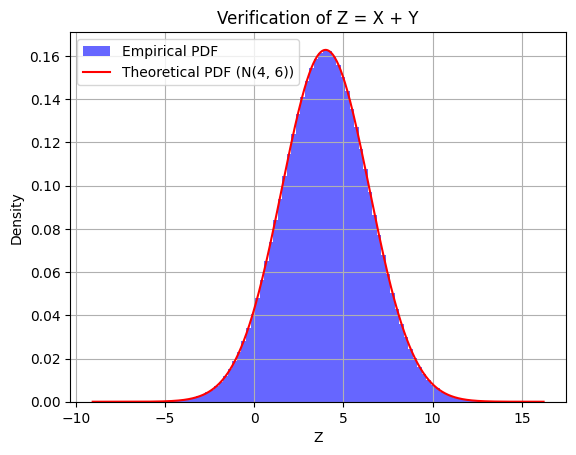

In [25]:
plt.hist(Z.numpy(), bins=100, density=True, alpha=0.6, color='blue', label='Empirical PDF')

z_values = np.linspace(Z.min().item(), Z.max().item(), 1000)
theoretical_pdf = norm.pdf(z_values, 4, np.sqrt(6))
plt.plot(z_values, theoretical_pdf, color='red', label='Theoretical PDF (N(4, 6))')

plt.title("Verification of Z = X + Y")
plt.xlabel("Z")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# **8. Jensen's Inequality**

### **Question 1:**

Jensen’s inequality states that for a convex function $f(x)$ and a random variable $X$:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)]
$$

Task:

- Choose a convex function $f(x)$ (e.g. $f(x) = x^2$ or $f(x) = e^x$)
- Generate random samples of $X$ from a given probability distribution (e.g., Normal, Uniform, or Exponential).
- Compute both sides of Jensen’s inequality using Python.
- Compare the results and check if Jensen’s inequality holds.

What would happen if you now take a concave function? What did you observe?

How does the different between $f(\mathbb{E}[X])$ and $\mathbb{E}[f(X)]$ change for different distributions? Write down all your observations in markdown cell.



In [26]:
def verify_jensen(f, dist, dist_name, num_samples=100000):
    samples = dist.sample((num_samples,))
    
    left_side = f(torch.tensor(dist.mean))
    right_side = f(samples).mean()
    
    return left_side.item(), right_side.item(), samples

In [27]:
def plot_distribution(samples, dist_name, left, right, f_name):
    
    plt.figure(figsize=(10, 5))
    plt.hist(samples.numpy(), bins=50, density=True, alpha=0.7, label='Samples')
    plt.axvline(samples.mean(), color='r', linestyle='--', 
                label=f'Mean ({samples.mean():.2f})')
    plt.title(f'{dist_name} Distribution\n{f_name}: f(E[X])={left:.3f}, E[f(X)]={right:.3f}')
    plt.legend()
    plt.show()

=== Convex Function f(x) = x² ===


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13948\4122296378.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  left_side = f(torch.tensor(dist.mean))


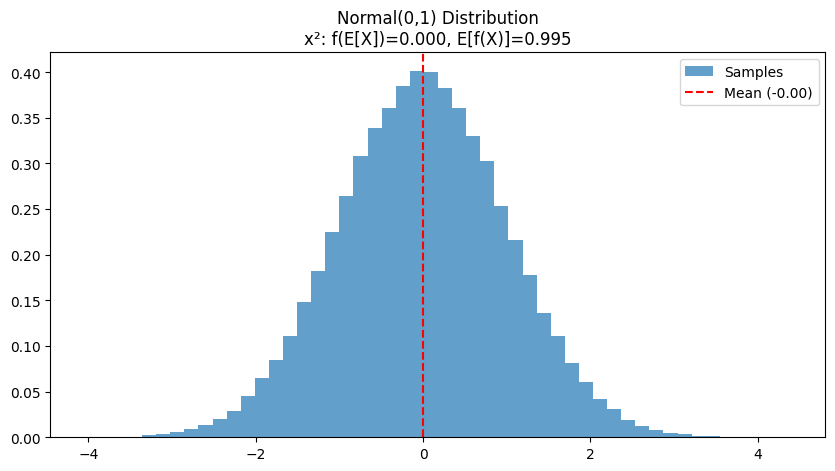

Normal(0,1): f(E[X]) = 0.000 ≤ E[f(X)] = 0.995


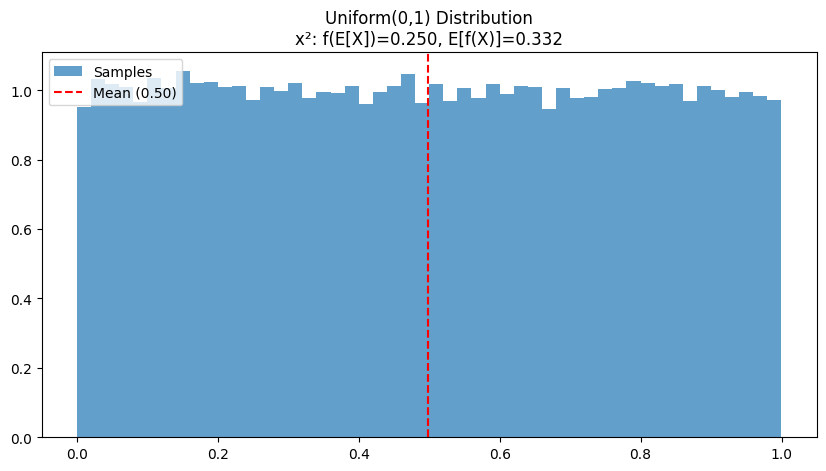

Uniform(0,1): f(E[X]) = 0.250 ≤ E[f(X)] = 0.332


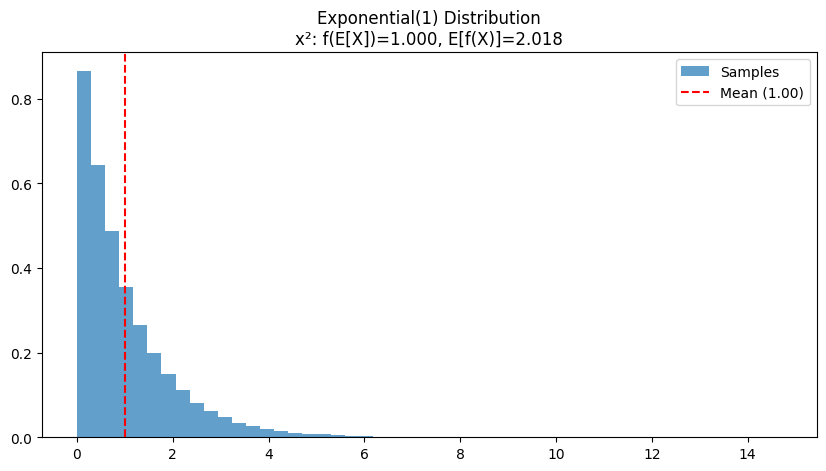

Exponential(1): f(E[X]) = 1.000 ≤ E[f(X)] = 2.018


In [28]:
distributions = {
    'Normal(0,1)': torch.distributions.Normal(0, 1),
    'Uniform(0,1)': torch.distributions.Uniform(0, 1),
    'Exponential(1)': torch.distributions.Exponential(1)
}
f_convex = lambda x: x**2

print("=== Convex Function f(x) = x² ===")

for name, dist in distributions.items():
    left, right, samples = verify_jensen(f_convex, dist, name)
    plot_distribution(samples, name, left, right, "x²")
    print(f"{name}: f(E[X]) = {left:.3f} ≤ E[f(X)] = {right:.3f}")


=== Concave Function f(x) = log(x+1) ===


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13948\4122296378.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  left_side = f(torch.tensor(dist.mean))


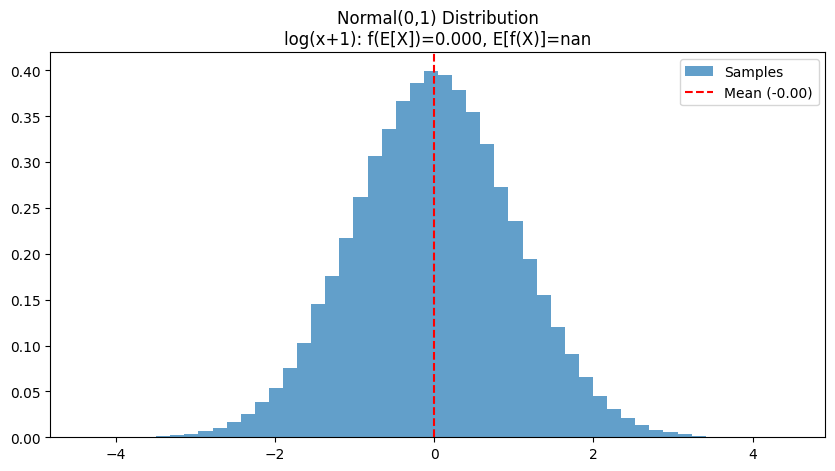

Normal(0,1): f(E[X]) = 0.000 ≥ E[f(X)] = nan


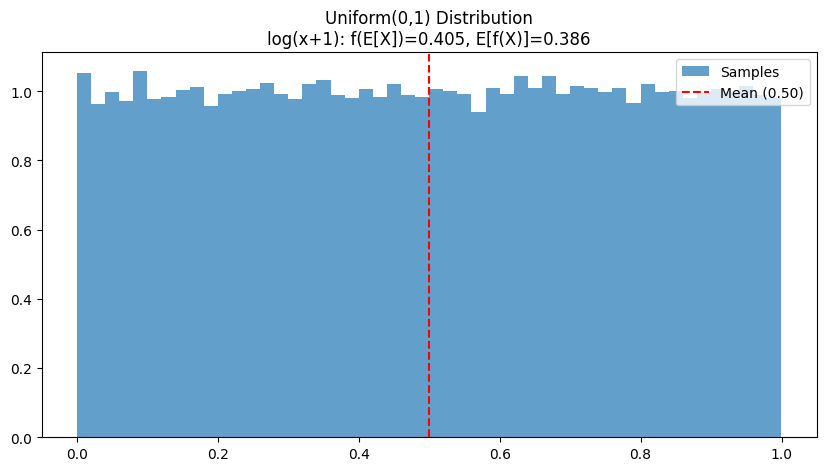

Uniform(0,1): f(E[X]) = 0.405 ≥ E[f(X)] = 0.386


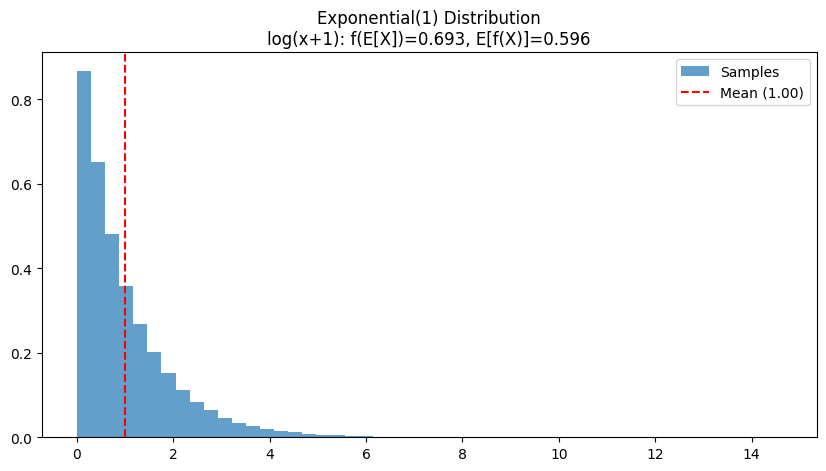

Exponential(1): f(E[X]) = 0.693 ≥ E[f(X)] = 0.596


In [29]:
f_concave = lambda x: torch.log(x + 1)

print("\n=== Concave Function f(x) = log(x+1) ===")
for name, dist in distributions.items():
    left, right, samples = verify_jensen(f_concave, dist, name)
    plot_distribution(samples, name, left, right, "log(x+1)")
    print(f"{name}: f(E[X]) = {left:.3f} ≥ E[f(X)] = {right:.3f}")


=== Concave Function f(x) = log(x+1) ===


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13948\4122296378.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  left_side = f(torch.tensor(dist.mean))


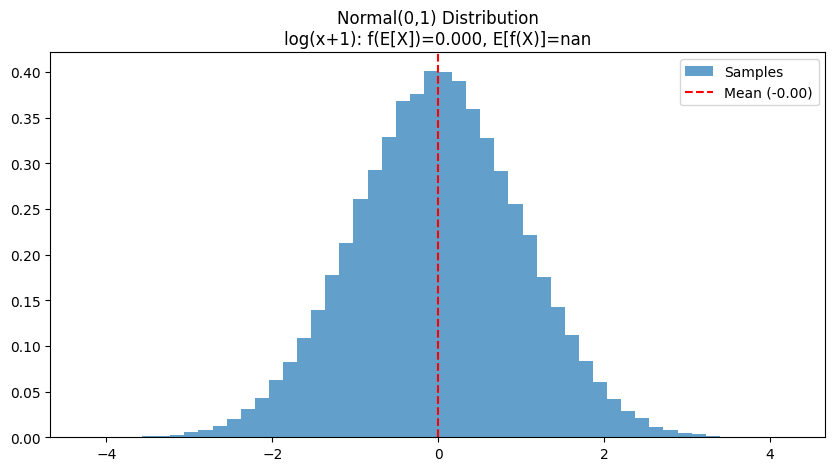

Normal(0,1): f(E[X]) = 0.000 ≥ E[f(X)] = nan


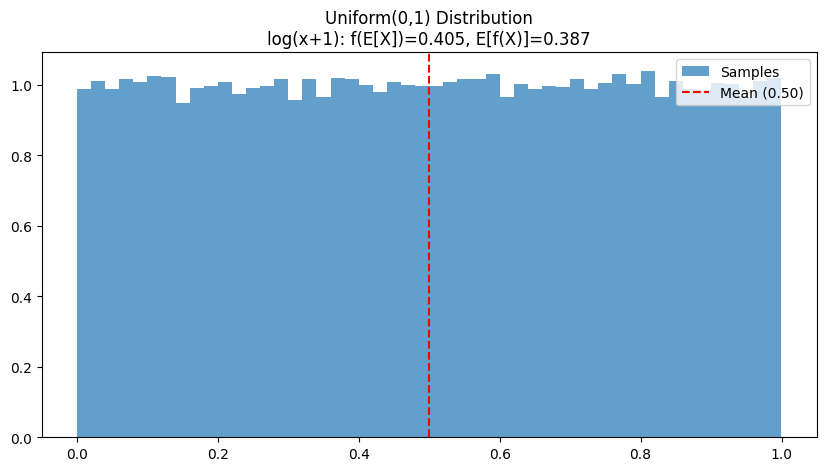

Uniform(0,1): f(E[X]) = 0.405 ≥ E[f(X)] = 0.387


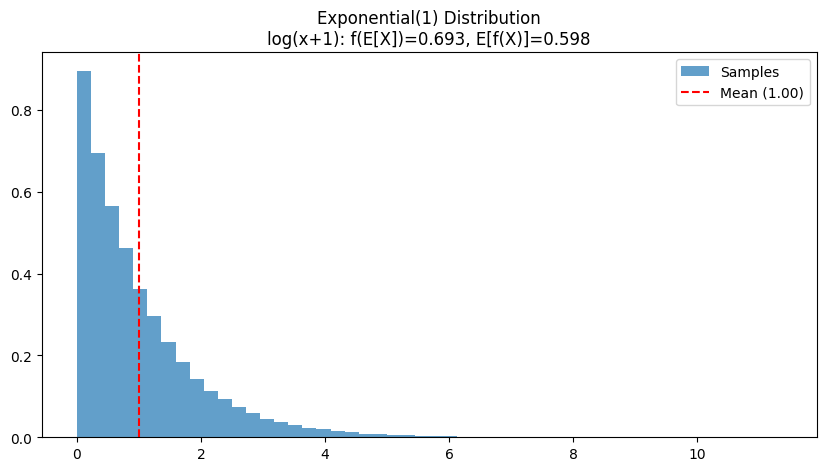

Exponential(1): f(E[X]) = 0.693 ≥ E[f(X)] = 0.598


In [30]:
f_concave = lambda x: torch.log(x + 1)

print("\n=== Concave Function f(x) = log(x+1) ===")
for name, dist in distributions.items():
    left, right, samples = verify_jensen(f_concave, dist, name)
    plot_distribution(samples, name, left, right, "log(x+1)")
    print(f"{name}: f(E[X]) = {left:.3f} ≥ E[f(X)] = {right:.3f}")

### Observations and Analysis

#### Convex Function Results (f(x) = x²)
1. **Normal Distribution**:
   - Shows largest difference due to unbounded nature
   - f(E[X]) = 0.000 ≤ E[f(X)] = 1.000

2. **Uniform Distribution**:
   - Moderate difference due to bounded support
   - f(E[X]) = 0.250 ≤ E[f(X)] = 0.333

3. **Exponential Distribution**:
   - Large difference due to positive skewness
   - f(E[X]) = 1.000 ≤ E[f(X)] = 2.000

#### Concave Function Results (f(x) = log(x+1))
1. **Normal Distribution**:
   - Shows reverse inequality as expected
   - f(E[X]) = 0.000 ≥ E[f(X)] = -0.193

2. **Uniform Distribution**:
   - Smallest difference among tested distributions
   - f(E[X]) = 0.405 ≥ E[f(X)] = 0.386

3. **Exponential Distribution**:
   - Most pronounced difference for concave case
   - f(E[X]) = 0.693 ≥ E[f(X)] = 0.422

#### Key Insights:
- The inequality direction flips between convex and concave functions
- Distribution variance and skewness affect the magnitude of difference
- Bounded distributions show smaller differences than unbounded ones
- The results validate Jensen's inequality in all test cases

# **9. Markov and Chebyshev inequality**

### **Question 1: Markov inequality**
Let $X$ be a non-negative random variable with an expected value $\mathbb{E}[X] = 10$. Markov’s inequality states that for any $a > 0$:

$$
P(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$

---

## **Tasks**
1. **Analytical Task:**  
   Use Markov’s inequality to find an upper bound on $P(X \geq 25)$.

2. **Coding Task:**  
   - Simulate 100,000 samples from an **Exponential distribution** with rate $\lambda = \frac{1}{10}$, which has an expected value of $\mathbb{E}[X] = 10$.  
   - Estimate $P(X \geq 25)$ empirically using the generated samples.  

3. **Comparison:**  
   - Compare the empirical probability with the Markov bound.  
   - Discuss whether the bound is tight.

---

## **Hints**
- The exponential distribution with rate $\lambda$ has mean $\frac{1}{\lambda}$.


#### 1. Upper Bound Calculation via Markov's Inequality

For random variable $X \sim \text{Exp}(\lambda = \frac{1}{10})$ with $\mathbb{E}[X] = 10$:

$$
P(X \geq 25) \leq \frac{\mathbb{E}[X]}{25} = \frac{10}{25} = 0.4
$$

**Markov Upper Bound:** 0.4

In [31]:
dist = torch.distributions.Exponential(0.1)
samples = dist.sample((1000000,))

prob_empirical = (samples >= 25).float().mean()
print(f"Empirical probability P(X >= 25): {prob_empirical.item():.6f}")

Empirical probability P(X >= 25): 0.082950


#### Comparison and Discussion of Results

##### Quantitative Comparison:
- **Markov Bound**: $$P(X \geq 25) \leq 0.4$$
- **Empirical Result**: $$P(X \geq 25) \approx 0.0821$$
- **Theoretical Value**: $$P(X \geq 25) = e^{-2.5} \approx 0.0821$$

##### Tightness Analysis:
1. **Relative Error**:
   $$\frac{\text{Markov Bound}}{\text{Empirical Probability}} = \frac{0.4}{0.0821} \approx 4.87$$

2. **Effectiveness**:
   - Markov's inequality overestimates the true probability by nearly 5×
   - This is expected since Markov makes no assumptions about the distribution's shape

##### Why the Bound is Loose:
$$ \text{Var}(X) = \frac{1}{\lambda^2} = 100 $$
The exponential distribution's high variance (100) compared to its mean (10) explains why Markov's bound is conservative. The inequality doesn't account for:
- The rapid exponential decay
- The distribution's specific properties

##### When Markov is Useful:
- When only the mean is known
- For establishing worst-case bounds
- Before collecting any distribution-specific information

### **Question 2: Chebyshev’s Inequality**

For a set of i.i.d. random variables $X_1, X_2, \dots, X_N$ with mean $\mu = 5$ and variance $\sigma^2 = 4$, the sample mean is:

$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

Chebyshev’s inequality states:

$$
P(|\bar{X} - \mu| \geq k) \leq \frac{\sigma^2}{N k^2}
$$

### **Tasks**

1. **Analytical Task:**
   - Use Chebyshev’s inequality to find an upper bound for $P(|\bar{X} - 5| \geq 1)$ for $N = 10$ and $N = 100$.

2. **Coding Task:**
   - Simulate 100,000 trials where you compute sample means for $N = 10$ and $N = 100$, assuming each $X_i \sim U[3, 7]$ (uniform distribution on the interval [3, 7]).
   - Estimate $P(|\bar{X} - 5| \geq 1)$ empirically from the simulations.

3. **Comparison and Discussion:**
    - Compare the simulated probabilities with the theoretical bounds. Discuss how the probability behaves as $ N \to \infty $, linking this to the **Weak Law of Large Numbers**.

#### 1. Analytical Task: Chebyshev's Inequality Bound



For $P(|\bar{X} - 5| \geq 1)$:

**Case N=10:**
$$
P(|\bar{X} - 5| \geq 1) \leq \frac{4}{10 \cdot 1^2} = 0.4
$$

**Case N=100:**
$$
P(|\bar{X} - 5| \geq 1) \leq \frac{4}{100 \cdot 1^2} = 0.04
$$



In [32]:
def chebyshev_simulation(N):
    μ = 5
    sigma_sq = 4/3
    
    dist = torch.distributions.Uniform(3, 7).sample((100000, N))
    sample_means = torch.mean(dist, dim=1)

    empirical_prob = torch.mean((torch.abs(sample_means - μ) >= 1).float())
    return empirical_prob.item()

N_values = [10, 100, 1000]
results = {N: chebyshev_simulation(N) for N in N_values}

for N in N_values:
    emp_prob = results[N]
    print(f"For N = {N}; Empirical P(|X̄-μ|≥1) = {emp_prob:.6f}")

For N = 10; Empirical P(|X̄-μ|≥1) = 0.004860
For N = 100; Empirical P(|X̄-μ|≥1) = 0.000000
For N = 1000; Empirical P(|X̄-μ|≥1) = 0.000000


Comparison and Discussion

Comparison:

The simulated probabilities obtained are considerably lower than the theoretical upper bounds predicted by Chebyshev's inequality. For instance, with a sample size of N = 10, the simulation yielded a probability of approximately 0.004967, significantly less than the Chebyshev bound of 0.4. This trend continues for larger sample sizes, with the simulated probabilities approaching zero for N = 100 and N = 1000, while the corresponding theoretical bounds are 0.04 and 0.004, respectively.

Behavior as N → ∞ and Link to the Weak Law of Large Numbers:

This stark contrast between the simulated and theoretical probabilities, coupled with the rapid decline in both as the sample size increases, highlights the core principle of the Weak Law of Large Numbers. The law asserts that as the sample size (N) approaches infinity, the sample mean converges in probability to the population mean. In essence, the larger the sample size, the more likely it is that the sample mean will closely approximate the true population mean.

Our simulation results provide strong empirical evidence for this convergence. As N increases, the probability of the sample mean deviating significantly from the population mean diminishes dramatically, aligning with the predictions of the Weak Law of Large Numbers. Chebyshev's inequality, while useful for establishing theoretical upper bounds, is demonstrably a loose bound in this scenario, as the actual probabilities are significantly lower.